In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh
import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

# Load the TensorBoard notebook extension
%load_ext tensorboard

%aimport models.AEFIT
%aimport models.base
%aimport Dataset_QSH
# !pip install livelossplot --user


Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


In [10]:
qsh = Dataset_QSH.Dataset_QSH()
file = ipysh.abs_builddir+'/te_db_r15u_shuffle.npy'
qsh.load(file)
    
# qsh.filter_number_set(15)
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
# qsh.unbias_mean(0.5, 'te')
# qsh.set_normal_positive()

# print("QSH rebalanced 15 points size: ", len(qsh))

# qsh.set_null(np.nan)
# qsh.clip_values(0.1,0.6)
# qsh.set_normal_positive()

## VAE reconstruction - beta KL

This is the Analytical way to compute KL term ... beta is applied to KL

In [11]:
vae = models.AEFIT.AEFIT(latent_dim=2, feature_dim=30, dprate=0., scale=1, beta=0., geometry=[20,20,10,10])

AEFIT5 ready:


In [12]:
p = Hplt.LSPlotBokeh()
p.set_model(vae)
p.set_data(qsh, counts=3000)
p.plot_notebook(notebook_url='http://172.17.0.2:8888')

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


Loading BokehJS ...

In [13]:
# models.base.train(vae, qsh, batch=200, epoch=1, loss_factor=1e-3)
vae.beta.assign( 0 )
h1 = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: vae.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=6, shuffle=False, callbacks=[h1])
models.base.fn_thread(vae, fit).control_panel()

Epoch 1/6
    281/Unknown - 9s 33ms/step - loss: 0.0041 - mse: 0.0041 - akl: 8.5708 - mkl: 6.9675 - b: 0.0000e+00

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


425/425 [==============================] - 15s 34ms/step - loss: 0.0028 - mse: 0.0028 - akl: 9.5901 - mkl: 7.9473 - b: 0.0000e+00 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - val_akl: 0.0000e+00 - val_mkl: 0.0000e+00 - val_b: 0.0000e+00
Epoch 2/6
425/425 [==============================] - 14s 33ms/step - loss: 2.5835e-04 - mse: 2.5149e-04 - akl: 12.1253 - mkl: 10.8878 - b: 0.0000e+00 - val_loss: 2.2564e-04 - val_mse: 2.2564e-04 - val_akl: 12.7166 - val_mkl: 11.7013 - val_b: 0.0000e+00
Epoch 3/6
425/425 [==============================] - 14s 34ms/step - loss: 1.9692e-04 - mse: 1.9576e-04 - akl: 12.5472 - mkl: 11.8661 - b: 0.0000e+00 - val_loss: 2.0123e-04 - val_mse: 2.0123e-04 - val_akl: 12.4551 - val_mkl: 11.9613 - val_b: 0.0000e+00
Epoch 4/6
425/425 [==============================] - 15s 35ms/step - loss: 1.8665e-04 - mse: 1.8529e-04 - akl: 12.5220 - mkl: 12.1825 - b: 0.0000e+00 - val_loss: 1.7402e-04 - val_mse: 1.7402e-04 - val_akl: 12.4906 - val_mkl: 12.2457 - val_b: 0.0000e+00
Ep

Exception in thread async train:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/nbmultitask.py", line 148, in run
    fn(*self._args,**self._kwargs)
  File "/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/models/base.py", line 351, in <lambda>
    super(AsyncTrain, self).__init__(target=lambda thread_print: fn(), name='async train')
  File "<ipython-input-13-5309f3264709>", line 5, in <lambda>
    fit = lambda: vae.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=6, shuffle=False, callbacks=[h1])
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 728, in fit
    use_multiprocessing=use_multiprocessing)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v2.py", line 324, in fit
  

In [14]:
vae.beta.assign( 1e-5 )
h2 = models.base.RecordMetrics()
ds = qsh.ds_array.map(lambda x,y: (x,x))
fit = lambda: vae.fit(ds.skip(5000).batch(100, drop_remainder=True), validation_data=ds.take(5000).batch(100), epochs=20, shuffle=False, callbacks=[h2])
models.base.fn_thread(vae, fit).control_panel()

Epoch 1/20
     72/Unknown - 3s 40ms/step - loss: 2.6555e-04 - mse: 1.8927e-04 - akl: 7.6282 - mkl: 7.9948 - b: 1.0000e-05

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)


425/425 [==============================] - 18s 42ms/step - loss: 2.5143e-04 - mse: 1.8897e-04 - akl: 6.2459 - mkl: 6.7476 - b: 1.0000e-05 - val_loss: 0.0000e+00 - val_mse: 0.0000e+00 - val_akl: 0.0000e+00 - val_mkl: 0.0000e+00 - val_b: 0.0000e+00
Epoch 2/20
425/425 [==============================] - 19s 45ms/step - loss: 2.4411e-04 - mse: 1.8900e-04 - akl: 5.3380 - mkl: 5.9017 - b: 1.0000e-05 - val_loss: 2.4327e-04 - val_mse: 1.9224e-04 - val_akl: 5.1027 - val_mkl: 5.6451 - val_b: 1.0000e-05
Epoch 3/20
425/425 [==============================] - 19s 46ms/step - loss: 2.3443e-04 - mse: 1.8432e-04 - akl: 4.9187 - mkl: 5.4614 - b: 1.0000e-05 - val_loss: 2.2863e-04 - val_mse: 1.8194e-04 - val_akl: 4.6692 - val_mkl: 5.2299 - val_b: 1.0000e-05
Epoch 4/20
425/425 [==============================] - 19s 45ms/step - loss: 2.3522e-04 - mse: 1.8769e-04 - akl: 4.7404 - mkl: 5.2359 - b: 1.0000e-05 - val_loss: 2.2187e-04 - val_mse: 1.7482e-04 - val_akl: 4.7050 - val_mkl: 5.1731 - val_b: 1.0000e-05
Epo

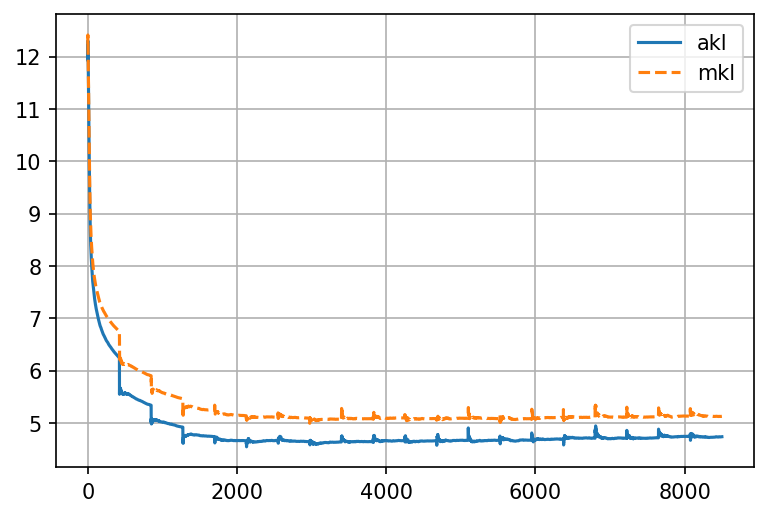

In [23]:
fig = plt.figure('kl')
fig.set_dpi(150)
ax = plt.gca()
plt.plot(h2.metrics['akl'], label='akl')
plt.plot(h2.metrics['mkl'],'--', label='mkl')
plt.legend()
ax.grid(True)

In [24]:
vae.save('STEP5_VAE2_disentangled')

/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/andrea/devel/rfx/rfx-hunch/src/Tprofile_read/Hunch_lsplot.py:282: RuntimeWarning: invalid value encountered in true_divide
  return (data - m) / (M-m)
